# **Aula Machine Learning - Trainee GVCode**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png"  width="40%" height="40%" position= 'center'>

>Machine Learning is making the computer learn from studying data and statistics.
>
>Machine Learning is a step into the direction of artificial intelligence (AI).
>
>Machine Learning is a program that analyses data and learns to predict the outcome.

Esse guia será dividido em 2 partes principais que são essenciais para a criação de um modelo funcional e utilizável:

1. Pré-processamento dos dados e análise exploratória

    1.1. Carregamento dos dados\
    1.2. Limpeza dos dados\
    1.3. Análise exploratória

2. Modelagem

    2.1. Criação do modelo\
    2.2. Resultados\
    2.3. Validação do modelo

## **Parte 1 - Pré-processamento dos dados e análise exploratória** - Problema Supervisionado (A máquina vai ver os dados)

### Pré-processamento

<img src="https://miro.medium.com/v2/resize:fit:640/0*Cir0TzUEkHMbb8QB"  width="40%" height="40%" position= 'center'>

O pré-processamento é uma parte crucial que deve ser feita sempre no ínicio de um projeto de Data Science (ao menos que algúem tenha feito para você). Isso inclui:
* Lidar com valores NULL, ou seja, sem valor
* Remover colunas e linhas com informações irrelevantes
* Detectar outliers
* Limpar os dados em geral.

In [2]:
import pandas as pd
import numpy as np

O dataset pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/sujay1844/used-car-prices/data), e no [GitHub do trainee](../data/car_old.csv).

In [8]:
# importing dataset
car_train = pd.read_csv('car_train.csv')

# printing the first 5 rows of dataset
car_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
# getting the columns of the dataset
columns = list(car_train.columns)
columns

['Unnamed: 0',
 'Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

Identifique e anote potenciais problemas que você terá que lidar no DataFrame:

* Estão faltam valores em algumas colunas (NaN). Isso poderá causar muitos problemas para a análise e modelagem se não resolvido no início do processo.

* Algumas colunas possuem palavras e números, como o mileage, engine e power. Isso pode ser um problema se a gente quiser montar um gráfico de time-series (evolução dos dados ao longo do tempo) pela data ou outros gráficos para explorar a relação da duration com outras variáveis.

* Existem diversas colunas com os strings que devem ser transformadas em dummies para que o modelo possa ser treinado.

In [10]:
# examining missing values - Quantidades de valores ausentes em cada coluna 
print("Missing values distribution: ")
print(car_train.isna().sum())
print("")

Missing values distribution: 
Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64



In [11]:
# O tamanho do nosso DataFrame - Linhas e Colunas   

car_train.shape

(6019, 14)

Como lidar com os valores nulos nas colunas?

Existem algumas formas para resolver esse problema:

1. Dropar a coluna inteira. Se a coluna não for muito importante ou tiver pouquíssimos dados, simplesmente a remova.

2. Continue com a coluna, caso ela seja importante.

3. Substituir os valores valores nulos por outros de forma que não interfira na análise. (Ex: foward fill, backwards fill, média, etc)

Foward fill -> o último valor conhecido é usado como referência 

Backward fill ->  O valor seguinté é usado como referência para os anteriores 




In [12]:
#drop the column with the missing values - Eliminando a Coluna New Price e Unnamed
car_train.drop(['New_Price', 'Unnamed: 0'], inplace=True, axis= 1) # inplace = True(não vai criar um novo dataFrame) / axis = 1 (especificando uma coluna)
car_train.dropna(inplace=True, axis=0) #Removendo todas as linhas que contenham pelo menos um valor NaN
car_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


Agora é preciso lidar com as colunas que contém números e strings, que vão atrapalhar na hora de fazer a modelagem. Primeiro vamos verificar o tipo das observações em cada coluna:

In [ ]:
# check datatype in each column
print("Column datatypes: ")
print(car_train.dtypes)

Column datatypes: 
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


Como podemos ver, as colunas Mileage, Engine e Power, que deveriam estar em int ou float, estão em string. Para arrumar isso:

1. Tirar as unidades de medida de todas as observações
2. Transformar a coluna em tipo numérico (int ou float)

In [13]:
#replace with blank and transform to float
car_train['Mileage'] = car_train['Mileage'].str.replace('kmpl', '').str.replace('km/kg', '')
car_train['Engine'] = car_train['Engine'].str.replace('CC', '')
car_train['Power'] = car_train['Power'].str.replace('bhp', '')

col = ['Mileage','Engine','Power'] # Lista com o nome das colunas que serão convertidas em números 

car_train[col] = car_train[col].apply(pd.to_numeric, errors= 'coerce',axis=1) #errors = "coerce" (se ocorrer algum erro, os valores serão definidos como Nan)

# raise (padrão) = o processo é interrompido 
# ignore = ignora o erro 
# ["raise", "coerce"] -> Podemos usar em formato de lista, dessa forma podemos controlar o comportamentos de diferentes colunas 

car_train.dropna(inplace=True, axis=0) # Removendo os NaN novamente 

car_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


Agora que resolvemos com as colunas que tinham valores em strings e numéricos, precisamos transformar em código as colunas com dados categóricos (Name, Location, Fuel_Type, Transmission):

In [16]:
from sklearn import preprocessing

In [29]:
cols = ['Location', 'Fuel_Type', 'Transmission'] # Listta das colunas que queremos alterar 

car_train[cols] = car_train[cols].apply(preprocessing.LabelEncoder().fit_transform) # LabelEncoder -> ferramenta para transformar rótulos categóricos em valores numéricos

car_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,1,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,2,2011,46000,3,1,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,2,2012,87000,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,4,2014,27365,1,1,1,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,6,2015,100000,1,1,1,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,8,2013,46000,3,1,1,18.90,998.0,67.10,5.0,2.65


In [30]:
car_train.Owner_Type.unique() #valores ordinais (não métrico)

array([1, 2, 4, 3], dtype=int64)

In [31]:
owner = {'First':1,'Second':2, 'Third':3,'Fourth & Above':4}

car_train.Owner_Type = car_train.Owner_Type.replace(owner)

In [32]:
car_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,1,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,2,2011,46000,3,1,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,2,2012,87000,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,4,2014,27365,1,1,1,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,6,2015,100000,1,1,1,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,8,2013,46000,3,1,1,18.90,998.0,67.10,5.0,2.65


### Análise exploratória

Com a nossa base de dados completamente limpa, vamos analisar a correlação entre as variáveis que vamos colocar no modelo de forma a aumentar sua acurácia.

<img src="https://i.stack.imgur.com/U834t.png"  width="50%" height="80%" position= 'center'>

Existem diferentes testes para diferentes situações, dependendo do tipo das variáveis.

In [33]:
#Análise do correlograma
car_train.corr(method='pearson')['Price'] # Correlação das variáveis com o preço, quanto mais próximo de 1, maior a correlação entre as variáveis 
# Pelo que tivemos de retorno ( Transmissão), não faz sentido a relação de uma variável categórica com uma contínua 
# Correlação negativa - sentidos negativos (ex: mais donos menor o preço )

C:\Users\filip\AppData\Local\Temp\ipykernel_12856\637126045.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_train.corr(method='pearson')['Price'] # Correlação das variáveis com o preço, quanto mais próximo de 1, maior a correlação entre as variáveis


Location            -0.118238
Year                 0.299475
Kilometers_Driven   -0.008249
Fuel_Type           -0.301626
Transmission        -0.585623
Owner_Type          -0.091098
Mileage             -0.341652
Engine               0.658047
Power                0.772843
Seats                0.055547
Price                1.000000
Name: Price, dtype: float64

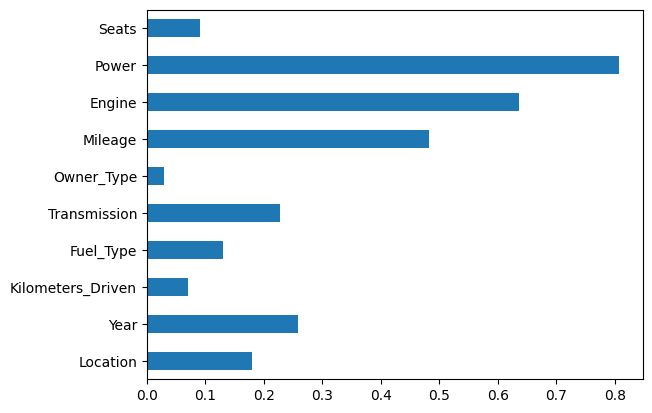

In [34]:
#Usando moddelo de regressão pra verificar como que cada variável vai impactar o modelo 

from sklearn.feature_selection import mutual_info_regression 
import matplotlib.pyplot as plt

X, y = car_train.drop(['Price', 'Name'], axis=1), car_train['Price'] #Escolhendo todas variáveis menos o preço e o nome e escolhendo o preço como objetivo 

importances = mutual_info_regression(X, y) # Calculando a importância de cada característica com a variável Preço 
feat_importances = pd.Series(importances, car_train.columns[1:len(car_train.columns)-1]) #Criando uma série para armazenar as pontuações calculadas
feat_importances.plot(kind='barh') # Vizualização das características através de um gráfico 

plt.show()

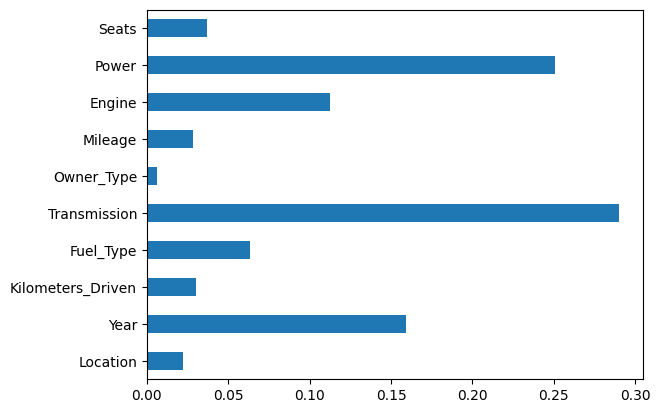

In [36]:
#Usando outro modelo de regressão 

from sklearn.ensemble import ExtraTreesRegressor

tree = ExtraTreesRegressor(n_estimators=50)
tree = tree.fit(X, y)

feat_importances = pd.Series(tree.feature_importances_, car_train.columns[1:len(car_train.columns)-1])
feat_importances.plot(kind='barh')

plt.show()

### Normalização dos dados

In [37]:
#fazer com que o modelo entenda melhor a grandeza dos dados, nesse caso vamos fazer os dados listados terem um "range" de 0 a 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

car_train[['Power', 'Engine', 'Mileage', 'Kilometers_Driven']] = scaler.fit_transform(car_train[['Power', 'Engine', 'Mileage', 'Kilometers_Driven']])

car_train

# Existem variáveis que não fazem sentido normalizar - qualificações 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,9,2010,0.011051,0,1,1,0.793083,0.069594,0.045569,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,0.006282,1,1,1,0.586464,0.178266,0.174971,5.0,12.50
2,Honda Jazz V,2,2011,0.007051,3,1,1,0.542636,0.106997,0.103652,5.0,4.50
3,Maruti Ertiga VDI,2,2012,0.013359,1,1,1,0.619261,0.116115,0.103766,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,3,2013,0.006231,1,0,2,0.453190,0.250093,0.202739,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,4,2014,0.004184,1,1,1,0.846750,0.116115,0.075694,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,6,2015,0.015359,1,1,1,0.727490,0.092296,0.069989,5.0,4.00
6016,Mahindra Xylo D4 BSIV,6,2012,0.008435,1,1,2,0.417412,0.348716,0.147965,8.0,2.90
6017,Maruti Wagon R VXI,8,2013,0.007051,3,1,1,0.563506,0.069594,0.062571,5.0,2.65


## **Parte 2 - Modelagem**

### Treino e teste



O primeiro passo para criar qualquer modelo de aprendizado de máquina é dividir os dados em conjuntos de 'treinamento', 'teste' e 'validação'. O conjunto de validação é opcional, mas muito importante se você planeja implantar o modelo na vida real.

Mas por que a validação é importante?

O conjunto 'train' é usado para treinamento, o conjunto 'test' é usado para executar as previsões e é com essas previsões que os hiperparâmetros são ajustados e o modelo é treinado novamente para melhor precisão. Assim, você pode ver que, às vezes, se você ajustar esses parâmetros, o modelo pode ser tendencioso para fornecer uma boa previsão apenas no conjunto de teste e não em qualquer conjunto geral.

In [39]:
from sklearn.model_selection import train_test_split
#Vamos treinar a máquina 
# Depois vamos mostrar apenas as variáveis para a máquina tentar predizer essas variáveis - Depois é possível comparar com a base real
# Validação - usar o modelo em base de dados que não foram treinadas (overfeeting (vai muito bem nessa base de dados) e underfeeting (poucos dados) )


#Definição de variáveis
X, y = car_train[['Power', 'Engine', 'Transmission', 'Year', 'Mileage']], car_train['Price']
# X, y = car_train[['Power','Transmission']], car_train['Price']
# X, y = car_train[['Year','Kilometers_Driven']], car_train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size= 0.7) #vai randomizar a base de dados e vai fazer 
                                                                                            # um corte pra base de treino (pode ser determinado) - 
                                                                                            # Não pode usar em time series 
                                                                                            # (por que existe uma tensência durante o tempo)


display(X_train,y_train)

,Power,Engine,Transmission,Year,Mileage
2692,0.296310,0.255117,0,2011,0.676506
70,0.885888,0.778191,0,2008,0.253429
5958,0.122480,0.162635,1,2015,0.769231
1798,0.090529,0.106624,1,2016,0.655933
3415,0.075694,0.116115,1,2016,0.751342
...,...,...,...,...,...
5059,0.103271,0.116115,1,2017,0.724508
3351,0.106124,0.143655,1,2014,0.685748
1699,0.206923,0.348902,1,2007,0.324985
2683,0.062457,0.069594,1,2017,0.688730


2692    10.30
70      14.50
5958     4.68
1798     5.10
3415     5.63
        ...  
5059     9.05
3351     4.50
1699     3.00
2683     4.99
2810     3.60
Name: Price, Length: 4110, dtype: float64

### Escolha do modelo - Nosso modelos: regressão boosted


**Machine Learning Algorithms Cheat Sheet**

<img src="https://learn.microsoft.com/en-us/azure/machine-learning/media/algorithm-cheat-sheet/machine-learning-algorithm-cheat-sheet.png#lightbox" position= 'center'>

<img src="https://miro.medium.com/v2/resize:fit:640/0*EQrcUkoZ1BfXNMWX" position= 'center'>


Para esse exercício, usarei uma regressão de Boosted Decision Tree, pois é um modelo um pouco mais complexo que tem um tempo de treinamento pequeno. Esse algorítmo funciona da seguinte forma: Junta árvores de decisões 


<img src="https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png"  width="60%" height="60%" position= 'center'>

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(n_estimators = 300, learning_rate = 0.5, max_depth=100) #mudanos o número de estimadores e aumentamos as interações 
reg = reg.fit(X_train, y_train) # fit é o treino - é usado para treinar o modelo usando os dados de treinamento fornecidos. 
                                # Durante o treinamento, o modelo ajusta seus parâmetros internos para minimizar a diferença entre as previsões 
                                # feitas pelo modelo e os valores reais observados nos dados de treinamento.

y_pred = reg.predict(X_test)

In [ ]:
pd.DataFrame(y_pred, y_test) #esquerda o preço real / direira é a nossa predição 

,0
Price,
0.85,1.050
10.94,15.250
3.00,2.250
16.00,17.250
4.95,3.000
...,...
3.40,2.745
30.37,22.660
10.46,9.872


### Validação



Com o modelo treinado, agora precisamos verificar e validar o modelo de acordo com a sua acurácia.

Como se trata de um problema de REGRESSÃO, devemos obrigatoriamente utilizar métricas de validação adequadas para REGRESSÕES:

<img src="https://miro.medium.com/v2/resize:fit:551/1*vEGKFDrA4mygKw_qg-D6tA.png"  position= 'center'>


In [ ]:
import sklearn.metrics as sm

#Métricas simples

print("Mean absolute error (MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2)) #Erro médio absoluto 
print(f"Mean absolute percentage error (MAPE) = {round(sm.mean_absolute_percentage_error(y_test, y_pred), 4): 0.2%}") #Erro médio absoluto em %
print("Mean squared error (MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2)) #Erro médio quadrado 
print(f'Root mean squared error (RMSE) = {round(sm.mean_squared_error(y_test, y_pred, squared= False),2)}') #Raiz quadrada da média dos erros - Quanto menor menlhor 
                                                                                                            # mede a média das diferenças quadradas entre os valores 
                                                                                                            # observados (reais) e os valores previstos pelo modelo.

Mean absolute error (MAE) = 1.93
Mean absolute percentage error (MAPE) =  20.05%
Mean squared error (MSE) = 23.34
Root mean squared error (RMSE) = 4.83


Para testar se o nosso modelo está overfittado, vamos utilizar a técnica de KFold para analisar a performance do modelo em diversas situações de treino e teste (não pode aplicar para time series):

<img src="https://miro.medium.com/v2/resize:fit:1202/0*O_491U1UfF1lIqz_.png"  position= 'center'>


In [41]:
from sklearn.model_selection import cross_val_score

#Validação por KFold

scores = cross_val_score(reg, X=X_train, y=y_train, cv=5, n_jobs=1, scoring= 'neg_root_mean_squared_error') #cv - Número de Folds, dados divididos em 5 partes 
                                                                                                            # n_jobs = o calculo será executado em apenas um núcleo 
                                                                                                            # RMSE - erro médio quadratico como forma de avaliação 

print('Acurácia da validação cruzada K-Fold: %.3f +/- %.3f' % (-np.mean(scores),np.std(scores)))

#Erro médio quadrado +/-
# Resultado - A média do RMSE através das 5 iterações da validação cruzada é aproximadamente 4.675.
# O desvio padrão do RMSE é 0.425.
# O desvio padrão de 0.425 em comparação com o valor médio de 4.675 é relativamente pequeno, 
# sugerindo que o modelo é consistente entre as diferentes iterações da validação cruzada. 
# Isso é um bom sinal e indica que o modelo não varia muito entre os diferentes folds.


Acurácia da validação cruzada K-Fold: 4.675 +/- 0.425


### Ensemble

 Técnica de aprendizado de máquina que combina as previsões de múltiplos modelos individuais para melhorar a precisão e a robustez das previsões. A ideia por trás dos métodos ensemble é que a combinação de vários modelos pode capturar uma gama mais ampla de padrões e variações nos dados, reduzindo assim o risco de overfitting e melhorando a performance geral.

 1- Bagging (Bootstrap Aggregating):
 
 a) Random Forest: Um dos exemplos mais conhecidos de bagging, onde múltiplas árvores de decisão são treinadas em diferentes subconjuntos dos dados de treinamento (obtidos por bootstrap) e suas previsões são combinadas (por votação para classificação ou média para regressão).
 
 2- Boosting:

 a) Gradient Boosting Machines (GBM): Modelos são treinados sequencialmente, com cada novo modelo corrigindo os erros dos modelos anteriores. Exemplos populares incluem XGBoost, LightGBM, e CatBoost.

 b) AdaBoost: Um método que ajusta o peso das observações com base no erro dos modelos anteriores, focando mais em observações difíceis.
 
 3- Stacking:
 
 a) Modelos individuais (de diferentes tipos ou parâmetros) são treinados e suas previsões são usadas como entradas para um modelo final (meta-modelo), que aprende a melhor combinação dessas previsões.
 
 4- Voting:Para problemas de classificação, várias previsões de modelos são combinadas por votação majoritária (votação simples) ou ponderada (votação ponderada) para decidir a classe final

<img src="https://miro.medium.com/v2/resize:fit:1050/1*DM1DhgvG3UCEZTF-Ev5Q-A.png"  position= 'center'>


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
import xgboost as xgb

from sklearn.model_selection import KFold

from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

# ensemble do modelo por stacking
@ignore_warnings(category=ConvergenceWarning)

def get_stacking():
	# modelos base
	level0 = list()
	level0.append(('KNeighbors', KNeighborsRegressor()))
	level0.append(('XGBoost', xgb.XGBRegressor()))
	level0.append(('Decision', DecisionTreeRegressor()))
	level0.append(('GradientBoosting', GradientBoostingRegressor()))
	# modelo meta learner
	level1 = LinearRegression()
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

# modelos para avaliar
def get_models():
	models = dict()
	models['KNeighbors'] = KNeighborsRegressor()
	models['DecisionTree'] = DecisionTreeRegressor()
	models['XGBoost'] = xgb.XGBRegressor()
	models['GradientBoosting'] = GradientBoostingRegressor(n_estimators = 300, learning_rate = 0.5, max_depth=100)
	models['Stacking'] = get_stacking()
	return models

# avaliação dos modelos por cross-validation
def evaluate_model(model, X, y):
	scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, error_score='raise')
	return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('%s %.3f (%.3f)' % (name, -np.mean(scores), np.std(scores)))
 
# os resultados da avaliação dos modelos por cross-validation indicam a performance de cada modelo na tarefa de regressão.
# métrica de avaliação: RMSE 

KNeighbors 4.629 (0.175)
DecisionTree 4.709 (0.559)
XGBoost 3.758 (0.385)
GradientBoosting 4.691 (0.408)
Stacking 3.742 (0.357)


Interpretação

1- O XGBoost apresenta o menor RMSE médio entre os modelos individuais, indicando uma boa performance na previsão.

2- O modelo Stacking também tem um RMSE médio competitivo, sugerindo que a combinação dos modelos base está ajudando a melhorar a precisão das previsões.

3- Os modelos KNeighbors e DecisionTree têm RMSEs médios mais altos, indicando uma performance inferior na tarefa de previsão em comparação com o XGBoost e o Stacking.

4- O desvio padrão em todos os modelos é relativamente baixo, o que sugere uma consistência razoável nas previsões entre as dobras de cross-validation.

In [ ]:
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#Métricas simples

print("Mean absolute error (MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print(f"Mean absolute percentage error (MAPE) = {round(sm.mean_absolute_percentage_error(y_test, y_pred), 4): 0.2%}")
print("Mean squared error (MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2))
print(f'Root mean squared error (RMSE) = {round(sm.mean_squared_error(y_test, y_pred, squared= False),2)}')

Mean absolute error (MAE) = 1.7
Mean absolute percentage error (MAPE) =  17.45%
Mean squared error (MSE) = 18.92
Root mean squared error (RMSE) = 4.35


In [ ]:
# errou menos do que o último modelo 